PART 2 : Read correspondences, do registration, save overlay and information about distances

In [1]:
from os import path
import glob,csv,re
import sys
import cv2
import numpy as np

install_dir = 'C:\\Users\\Schwab\\Documents\\msite'
sys.path.append( path.dirname( install_dir+"\\CLEMSite\\"))

from common.virtualGridMap import *
from common.virtualMapManager import *
from common.microadapterAtlas import *
from numpy.linalg import matrix_rank,qr
from scipy.linalg import orth
import logging
import re
import os

from common.ptp import transformPoint,getLocalTransform

from numpy.linalg import matrix_rank,qr
from scipy.linalg import orth
from math import degrees
from pathlib import Path

In [2]:
# BATCH1
dir_batch =  "Z:\\lleti\\AUTOCLEM\\13_July_2018\\FIRST_RUN\\My_Project_halloween\\BATCH_1"
renamed_dir = "Z:\\lleti\\AUTOCLEM\\13_July_2018\\FIRST_RUN\\My_Project_halloween\\renamed"

In [3]:
list_batch = glob.glob(dir_batch+'\\*')
list_batch = [ el for el in list_batch if os.path.isdir(el)]

In [4]:
def getTag(folder_name):
    subpos1 = folder_name.find('X0')
    subpos2 = folder_name.find('___')
    return folder_name[subpos1:subpos2]

In [5]:
file_correspondences = {}
for folder in list_batch:
    pattern = re.compile('.*correspondences.json');
    list_files = glob.glob(folder+'\\*')
    corr_paths = [list_files[i] for i, x in enumerate(list_files) if pattern.search(x)]
    if corr_paths:
        _ , tail  = os.path.split(folder)
        tag = getTag(tail)
        file_correspondences[tag] = corr_paths[0]

In [6]:
file_correspondences


{'X00--Y04_0004': 'Z:\\lleti\\AUTOCLEM\\13_July_2018\\FIRST_RUN\\My_Project_halloween\\BATCH_1\\2G_field--X00--Y04_0004___0003\\correspondences.json',
 'X00--Y08_0007': 'Z:\\lleti\\AUTOCLEM\\13_July_2018\\FIRST_RUN\\My_Project_halloween\\BATCH_1\\3I_field--X00--Y08_0007___0005\\correspondences.json',
 'X00--Y24_0014': 'Z:\\lleti\\AUTOCLEM\\13_July_2018\\FIRST_RUN\\My_Project_halloween\\BATCH_1\\2Q_field--X00--Y24_0014___0004\\correspondences.json',
 'X00--Y27_0016': 'Z:\\lleti\\AUTOCLEM\\13_July_2018\\FIRST_RUN\\My_Project_halloween\\BATCH_1\\8Q_field--X00--Y27_0016___0010\\correspondences.json',
 'X01--Y23_0023': 'Z:\\lleti\\AUTOCLEM\\13_July_2018\\FIRST_RUN\\My_Project_halloween\\BATCH_1\\9O_field--X01--Y23_0023___0015\\correspondences.json',
 'X01--Y26_0024': 'Z:\\lleti\\AUTOCLEM\\13_July_2018\\FIRST_RUN\\My_Project_halloween\\BATCH_1\\6Q_field--X01--Y26_0024___0009\\correspondences.json',
 'X01--Y27_0025--001': 'Z:\\lleti\\AUTOCLEM\\13_July_2018\\FIRST_RUN\\My_Project_halloween\\BA

In [7]:
import json
import pandas as pd
list_over = glob.glob(renamed_dir+'\\*LM_list_overlays*')
mapOverlay = pd.read_json(list_over[0])

In [8]:
mapOverlay


field--X00--Y02_0002  \
0             [89.83333333333331, 304.1666666666667]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   

                                field--X00--Y03_0003  \
0                                     [115.5, 377.5]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   

                                field--X00--Y04_0004  \
0                        [350.33333333333326, 508.0]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   

                                field--X00--Y06_0005  \
0                                      [494.8, 60.2]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   

                                field--X00--Y07_0006  \
0                                 [530.375, 105.375]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   

                                field--X00--Y08_0007  \
0                                      [466.0, 56.0]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   

                           field--X00--Y08_0007--001  \
0                                     [574.0, 573.0]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   

                                field--X00--Y10_0008  \
0                                     [558.0, 225.0]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   

                           field--X00--Y10_0008--001  \
0                                     [446.0, 222.0]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   

                                field--X00--Y11_0009  \
0                                     [498.0, 106.0]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           

                                field--X03--Y06_0032  \
0                                    [263.25, 388.0]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   

                                field--X03--Y19_0033  \
0            [516.1666666666665, 217.16666666666663]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   

                                field--X03--Y20_0034  \
0                                     [402.9, 241.2]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   

                                field--X03--Y21_0035  \
0                                     [403.0, 346.5]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   

                                field--X03--Y23_0036  \
0            [558.7142857142857, 178.14285714285714]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   

                           field--X03--Y23_0036--001  \
0                         [506.6666666666666, 468.0]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   

                                field--X03--Y24_0037  \
0                                      [114.0, 67.0]   
1  Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...   
2  Z:\lleti\AUTOCLEM\13_July_2018\FIRST

In [9]:
# Obtain sFOV images
def getCoords(Ht, coords_or):
    my_p = coords_or
    x = my_p[0]
    y = my_p[1]
    tmp = np.float32([x, y, 1.0])
    trh = np.dot(Ht, tmp.transpose())
    trh /= trh[2]
    return trh


In [10]:
def plotImage(image, points, color = 'red', txt = [], title = None, folderToSave = None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    if np.any(points):
        if (points.ndim)==1:
            plt.scatter(np.int16(points[0]),np.int16(points[1]),c=color)
            ax.annotate('Center', (int(points[0]+2), int(points[1])), color='white')
        else:
            plt.scatter(np.int16(points[:,0]),np.int16(points[:,1]),c=color)
            for i in range(len(points)):
                point = points[i]
                if txt:
                    ax.annotate(str(txt[i]), (int(point[0]+2), int(point[1])), color='white')
                else :
                    ax.annotate(str(i), (int(point[0]+3), int(point[1]-1)), color='white')
    if folderToSave and title:
        ax.imshow(image)
        fig.savefig(folderToSave+'\\'+title+'.png', dpi=300,bbox_inches='tight',pad_inches = 0)
        plt.close()
    else:
        plt.imshow(image)

In [11]:
%pylab inline
import json
pylab.rcParams['figure.figsize'] = (10, 10)

from common.image_an.imtools import getFOV, getPixelSize
from skimage import transform as tf

to_plot = {}

dir_overlays = renamed_dir+"\\overlays_LM_SEM"
if not os.path.exists(dir_overlays):
    os.makedirs(dir_overlays)

for tag,mfile in file_correspondences.items():
    
    item_dir = dir_overlays+"\\"+tag
    if not os.path.exists(item_dir):
        os.makedirs(item_dir)
    
    df_corr = pd.read_json(mfile)
    
    LM_overlay = mapOverlay['field--'+tag]
    print(tag)
    print(LM_overlay)
    coords_LM = LM_overlay[0]
  
    over_im = cv2.imread(LM_overlay[1],1)
    over_im = cv2.flip(over_im, 1)
    over_im_RL = cv2.imread(LM_overlay[2],1)
    
    over_im_RL = over_im_RL[:,:,::-1]
    points = np.array(list(df_corr.LM))
    plotImage(over_im_RL, points, title='LM_points',folderToSave = item_dir)
    
    
    cell_1, _ = os.path.split(mfile)
    em_image =  glob.glob(cell_1+'\\*sFOV*')[0]
    em_im = cv2.imread(em_image,1)
    pixel_size_EM =getPixelSize(em_image,atlas=True)
    
    points = np.array(list(df_corr.EM))
    plotImage(em_im,points, color = 'yellow',title='SEM_points',folderToSave = item_dir)
    
    pts1 = np.float32(list(df_corr.LM))
    pts2 = np.float32(list(df_corr.EM))
    M,_ = getLocalTransform(pts1,pts2,'affine')
    # M = tf.estimate_transform('affine', np.array(list(df_corr.LM)),np.array(list(df_corr.EM)))
    # M = (M.params).astype(np.float32)
    
    rows,cols,_= em_im.shape

    dst = cv2.warpPerspective(over_im,M,(int(rows),int(cols)))
    
    # top, bottom, left, right = [int((h-rows)//2)]*4
    # dst = cv2.copyMakeBorder(dst, top, bottom, left, right, cv2.BORDER_CONSTANT)
    overlay = cv2.addWeighted(dst, 0.5, em_im, 0.5, 1)
    
    cv2.imwrite(item_dir+'\\overlay_SEM_LM.tif',overlay)
    
    h, w,_ = over_im.shape
    hcoords_LM = np.array(coords_LM)
    hcoords_LM[0] = h - coords_LM[0] # flip horizontally coordinate
    coords_SEM = getCoords(M,hcoords_LM)
    
    plotImage(overlay, np.array([ coords_SEM[0:2],[rows//2,cols//2]]),color=['red','blue'], txt =['Target','Landing'],title='Overlay', folderToSave = item_dir)
    
    # Measures
    to_save = {}
    pix_diff = np.diff([coords_SEM[0:2], [512,512]], axis=0)
    pix_euc = np.sqrt(np.sum(pix_diff**2))
    to_save['rmse_pix'] = pix_euc 
    to_save['diff_pix'] = np.squeeze(pix_diff) 
    
    to_save['rmse_euc'] = pixel_size_EM*pix_euc    
    to_save['diff_euc'] = pixel_size_EM*np.squeeze(pix_diff)
    
    to_plot[tag] = to_save

    

Populating the interactive namespace from numpy and matplotlib
X00--Y04_0004
0                          [350.33333333333326, 508.0]
1    Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...
2    Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...
Name: field--X00--Y04_0004, dtype: object


C:\Users\Schwab\Anaconda3\envs\msite36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['degrees', 'random', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


X00--Y24_0014
0                                       [394.6, 547.6]
1    Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...
2    Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...
Name: field--X00--Y24_0014, dtype: object
X02--Y00_0026--002
0               [424.6666666666666, 244.3333333333333]
1    Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...
2    Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...
Name: field--X02--Y00_0026--002, dtype: object
X02--Y00_0026
0                                        [481.0, 68.0]
1    Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...
2    Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...
Name: field--X02--Y00_0026, dtype: object
X02--Y04_0028
0                                       [184.75, 32.0]
1    Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...
2    Z:\lleti\AUTOCLEM\13_July_2018\FIRST_RUN\My_Pr...
Name: field--X02--Y04_0028, dtype: object
X00--Y08_0007
0                                        [466.0, 56.0]
1    Z:\lleti\AUTOCLEM\13_July_2018\F

In [14]:
df = pd.DataFrame(to_plot)
df.to_json(renamed_dir+'\\rmse_values.json')

In [21]:
df_data = df.transpose()

(array([12.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1.49782713,   9.92176978,  18.34571242,  26.76965506,
         35.1935977 ,  43.61754034,  52.04148299,  60.46542563,
         68.88936827,  77.31331091,  85.73725356,  94.1611962 ,
        102.58513884]),
 <a list of 12 Patch objects>)

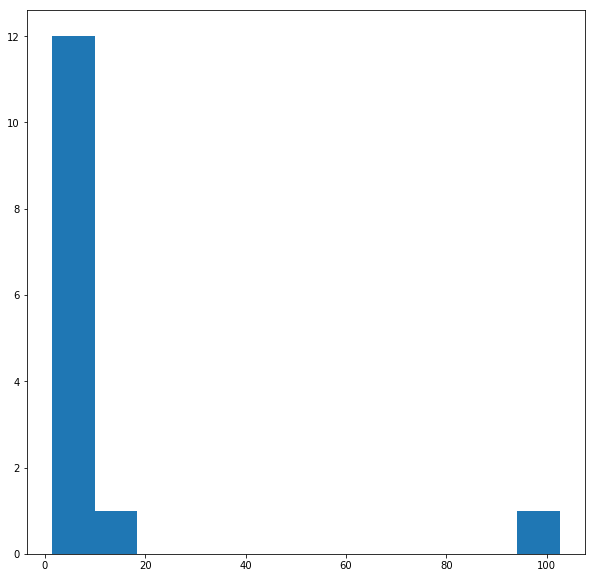

In [37]:
rmse_euc = np.array(df_data.rmse_euc)
#rmse_euc = rmse_euc[rmse_euc<50]
plt.hist(rmse_euc, bins = 12)


Part 2: Reading file of manual located landmarks between LM and EM 

In [ ]:
from skimage import transform as tf
M = tf.estimate_transform('affine', np.array(list(df_corr.LM)),np.array(list(df_corr.EM)))
M = (M.params).astype(np.float32)
M

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
# Show correspondences in EM


In [39]:
len(rmse_euc)


14

In [ ]:

plt.imshow(overlay)

em_image

In [ ]:
# Halloween map I
fname = Path("D:\\GOLGI\\13_July_2018\\FIRST_RUN\\My_Project_halloween\\my_map.json")
# Halloween map II
# fname = Path("D:\\GOLGI\\13_July_2018\\FIRST_RUN\\My_Project_halloween\\my_mapHalloween.json")
# December map

# January map
# fname = Path("D:\\GOLGI\\13_July_2018\\My_Project_January_III\\my_map_january.json")

In [ ]:
%load_ext autoreload
%autoreload 2
from pathlib import Path

logger = logging.getLogger('MyLogger')
logger.setLevel(logging.DEBUG)

msc_server = MicroAdapterAtlas() 
msc_server.setLogger(logger)
vMapManager = VirtualMapManagerSEM(logger, msc_server)

vMapManager.addMap("Canvas_SEM")
vMapManager.addMap("LM_SEM")


f = open(fname, 'r')
dict_map = json.load(f)
f.close()

d1 = dict_map["LM_SEM"]
d2 = dict_map["Canvas_SEM"]
vMapManager.loadMap(d1)
# Now we have to add all the landmarks from LM_SEM
vMapManager.loadMap(d2)

vMap = vMapManager.getMap("LM_SEM")

In [ ]:
# Read all coordinates
def getCoordData(dirname):
    list_dirs = glob.glob(dirname+'\\*')
    pattern = re.compile('_fpoints.csv');
    indices = [i for i, x in enumerate(list_dirs) if pattern.search(x)]
    if(indices):
        fname = list_dirs[indices[0]]
    else:
        return
    with open(fname, 'r') as f:
            reader = csv.reader(f)
            mlist = []
            for row in reader: 
                if(row):
                    if(row[0]!='point'):
                        mlist.append(row[0:5])
    if(mlist):
        coords_px = []
        name = []
        for el in mlist:
            coords_px.append(np.array([float(el[0]),float(el[1])],dtype=np.float32))
            if (len(mlist)>3):
                name.append(el[3])
            else:
                _,tag = os.path.split(fname)
                tag = tag[6:8]
                name.append(tag)
        return coords_px,name

In [ ]:
directory_with_coords = cell_1

crosses_gathered = []
list_crosses = glob.glob(str(directory_with_coords)+'\\*')
pattern = re.compile('cross_det');
crosses_dirs = [list_crosses[i] for i, x in enumerate(list_crosses) if pattern.search(x)]
for el in crosses_dirs:
    value = getCoordData(el)
    if value:
        crosses_gathered.append(value)

In [ ]:
crosses_gathered

In [ ]:
tags = []
coords_SEM_resolved = []
for coords,tag in crosses_gathered:
    tags.append(tag[0])
    coords_SEM_resolved.append(coords[0])

In [ ]:
coords_LM, tags = vMap.getCoordsFromLandmarks(tags,1)
coords_LM

In [ ]:
H,_ = getLocalTransform(coords_LM[:,0:2],np.array(coords_SEM_resolved),'affine')

In [ ]:
vMap.getLandmarkIDsByType(PointType.target)

In [ ]:
# Option 1, insert coordinate of LM of cell manually
#  cell_1 3F_field--X02--Y00_0026--001
coords_LM_cell1 = np.array([37.57231,57.113834],dtype = np.float32)

In [ ]:
vMap.getLandmark()

In [ ]:
my_p = coords_LM_cell1

x = my_p[0]
y = my_p[1]
tmp = np.float32([x, y, 1.0])
trh = np.dot(H, tmp.transpose())
trh /= trh[2]
trh

In [ ]:
coords_SEM_cell1 = trh[0:2]
coords_SEM_cell1_landing = np.array([-41982.5,-61171.3], dtype = np.float32)
diff = np.diff([coords_SEM_cell1,coords_SEM_cell1_landing], axis=0)
diff

In [ ]:
coords_SEM_original[:,0:2]

In [ ]:
coords_canvas = coords_canvas[:,0:2]
Q,R = qr(coords_canvas.transpose())
print Q
A = orth(coords_canvas.transpose())
print A


In [ ]:
print degrees(angle_between(Q[0],Q[1]))
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
ax.quiver(Q[0],Q[1],angles='xy',scale_units='xy',scale=1)
ax.set_xlim([-1,2])
ax.set_ylim([-1,2])
plt.draw()
plt.show()

In [ ]:
my_coords[0]
print unit_vector(v0)
print unit_vector(v1)
print unit_vector(v2)
print unit_vector(v3)

In [ ]:
A.transpose()

In [ ]:
def collinear(p0, p1, p2):
    x1, y1 = p1[0] - p0[0], p1[1] - p0[1]
    x2, y2 = p2[0] - p0[0], p2[1] - p0[1]
    val = x1 * y2 - x2 * y1
    print val
    return abs(val) < 1e-2

In [ ]:
my_coords = coords_LM[(0,1,17),0:2]
collinear(my_coords[0],my_coords[1],my_coords[2])

In [ ]:
my_coords

In [ ]:
u,s,v = np.linalg.svd(coords_LM)

In [ ]:
s

In [ ]:
sum( np.where( s>1, 1, 0 ))

In [ ]:
v

In [ ]:
print degrees(angle_between(v[0],v[1]))

In [ ]:
print degrees(angle_between(v[0],[1,0]))

In [ ]:
coords_SEM_original, tags = vMap.getCoordsFromLandmarks(tags,2)
Hor,_ = getLocalTransform(coords_LM[:,0:2],np.array(coords_SEM_original[:,0:2]),'affine')
x = my_p[0]
y = my_p[1]
tmp = np.float32([x, y, 1.0])
trh = np.dot(Hor, tmp.transpose())
trh /= trh[2]
trh